## Problem # 3

Problem # 3 uses "Cancer" dataset (from the Sklearn) to build a Logistic Regression model to classify the type of Cancer (Malignant Vs. Benign). First a Logistic Regression will be created to take all the 30 input features for classification. 80% and 20% split will be used between training and evaluation(test).

In [2]:
# Importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
import seaborn as sns

In [5]:
# Importing Necessary libraries and Cancer Dataset from sklearn 
from sklearn.datasets import load_breast_cancer

In [6]:
breast = load_breast_cancer()

In [7]:
breast_data = breast.data
breast_data.shape

(569, 30)

In [8]:
breast_input = pd.DataFrame(breast_data)
breast_input.head(10)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [9]:
breast_labels = breast.target
breast_labels.shape

(569,)

In [10]:
labels = np.reshape(breast_labels, (569,1))

In [11]:
final_breast_data = np.concatenate([breast_data, labels], axis = 1)
final_breast_data.shape

(569, 31)

In [12]:
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [13]:
features_labels = np.append(features, "label")

In [14]:
breast_dataset.columns = features_labels
breast_dataset.head(25)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.71190,0.26540,0.4601,0.11890,0.0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.24160,0.18600,0.2750,0.08902,0.0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.45040,0.24300,0.3613,0.08758,0.0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.68690,0.25750,0.6638,0.17300,0.0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.40000,0.16250,0.2364,0.07678,0.0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.53550,0.17410,0.3985,0.12440,0.0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.37840,0.19320,0.3063,0.08368,0.0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.26780,0.15560,0.3196,0.11510,0.0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.53900,0.20600,0.4378,0.10720,0.0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.10500,0.22100,0.4366,0.20750,0.0


In [15]:
# Defining the Independent and Dependent Variables
X_Cancer = breast_dataset.values[:,:30]
Y_Cancer = breast_dataset.values[:,30]

In [16]:
# MinMax and Standard Scaling as part of Data Preprocessing
Min_Max_Scaling = MinMaxScaler()
X_Cancer = Min_Max_Scaling.fit_transform(X_Cancer)

Standard_Scaling = StandardScaler()
X_Cancer = Standard_Scaling.fit_transform(X_Cancer)

In [17]:
# Splitting the Data into Training and Validation(Test) set
X_train, X_test, Y_train, Y_test = train_test_split(X_Cancer, Y_Cancer, train_size = 0.8, test_size = 0.2, random_state = 0)

In [18]:
# Logistic Regression
Log_Regression = LogisticRegression(random_state = 0)
Log_Regression.fit(X_train, Y_train)
Y_Prediction = Log_Regression.predict(X_test)

In [19]:
# Genration of a Confusion Matrix for Evaluating accuracy
Confusion_Matrix_Cancer = confusion_matrix(Y_test, Y_Prediction)
Confusion_Matrix_Cancer

array([[45,  2],
       [ 2, 65]], dtype=int64)

In [20]:
# Evaluation of the model using Accuracy, Precision, & Recall
Accuracy = metrics.accuracy_score(Y_test, Y_Prediction)
Precision = metrics.precision_score(Y_test, Y_Prediction)
Recall = metrics.recall_score(Y_test, Y_Prediction)

In [21]:
print("Accuracy = ", Accuracy)
print("Precision = ", Precision)
print("Recall = ", Recall)

Accuracy =  0.9649122807017544
Precision =  0.9701492537313433
Recall =  0.9701492537313433


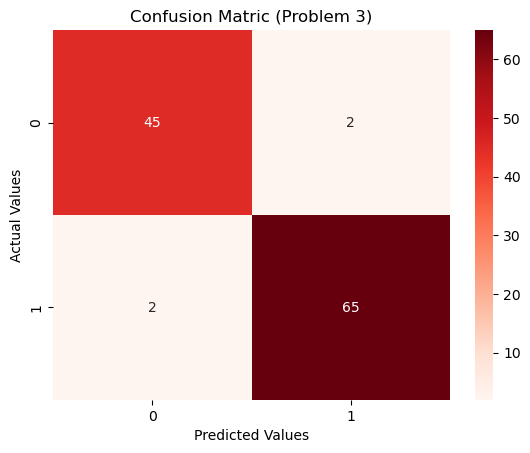

In [22]:
# Plotting the Binary Classifier Model
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names);
plt.yticks(tick_marks, class_names);

# Representation of the Binary Classifier using a Confusion Matrix
sns.heatmap(pd.DataFrame(Confusion_Matrix_Cancer), annot = True, cmap = "Reds", fmt = "g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Confusion Matric (Problem 3)");

In [23]:
# Adding Parameter Penalties
clf = LogisticRegression(penalty = "l1", C = 0.1, solver = "liblinear")
clf.fit(X_train, Y_train)
print("Training Accuracy = ", clf.score(X_train, Y_train))
print("Test Accuracy = ", clf.score(X_test, Y_test))

Training Accuracy =  0.9758241758241758
Test Accuracy =  0.9736842105263158


## Problem # 4

A repetation of previous problem with the use of K-fold Cross-Validation for training and validation data set. The training will be performed twice with K = 5 and K = 10. For the second part of the problem, Weight Penalty will be added, considering the # of parameters.

In [24]:
# K-fold Cross-Validation for Training and Validation
Kfold = KFold(n_splits = 5, random_state = 0, shuffle = True)
model = LogisticRegression(solver = "liblinear")
results = cross_val_score(model, X_Cancer, Y_Cancer, cv = Kfold)

print("Accuracy = ", results.mean())

Accuracy =  0.9719298245614034


In [25]:
# K-fold Cross-Validation for Training and Validation
Kfold = KFold(n_splits = 10, random_state = 0, shuffle = True)
model = LogisticRegression(solver = "liblinear")
results = cross_val_score(model, X_Cancer, Y_Cancer, cv = Kfold);

print("Accuracy = ", results.mean())

Accuracy =  0.9789473684210526


In [26]:
# Adding Parameter Penalties
model = LogisticRegression(penalty = "l1", C = 0.1, solver = "liblinear")
model.fit(X_train, Y_train)
print("Training Accuracy = ", clf.score(X_train, Y_train))
print("Test Accuracy = ", clf.score(X_test, Y_test))

Training Accuracy =  0.9758241758241758
Test Accuracy =  0.9736842105263158
